This example showcases the use of the EZ module in order to fit electrochemical impedance spectroscopy data recorded at different potential using an equivalent circuit.

### Equivalent circuit definition

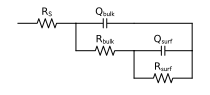

In [32]:
from EZ import EC

R_sol = EC.R("S")
R_b = EC.R("bulk")
Q_b = EC.Q("bulk")
R_s = EC.R("surf")
Q_s = EC.Q("surf")

circ = R_sol + Q_b/(R_b + Q_s/R_s)
circ.print()

circ_b = Q_b/R_b
circ_s = Q_s/R_s

### Loading and plotting the EIS data

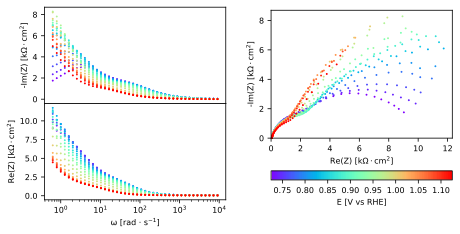

In [13]:
from EZ.data import Dataset

ds = Dataset(
    folder = "data/EIS CFO pH14 light",
    pH = 14,
    area = 0.25
)
ds.set_freq_range([-np.inf, 1e4])
# ds.data(0).plot(partial_circuits = [circ_b, circ_s])
ds.plot()

### Fitting and displaying fit results

In [ ]:
ds.fit(EC, pars = pars)